<a href="https://colab.research.google.com/github/alik604/eminem_lyrics_generator/blob/master/eminem_lyrics_generator_LSTM_%26_HMM_Alik604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# By Alik604
## Adapted from https://github.com/rojagtap/eminem_lyrics_generator
> 

In [87]:
# from google.colab import drive
# drive.mount('/content/drive')
# cd /content/drive/My Drive/Data

In [88]:
import pandas as pd
import numpy as np
import re
import os
import glob
import json

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Starting Preprocessing - Check point
> This can be disreguarded as data is provided a single .csv

In [ ]:
## retain

# !pip install lyricsgenius
# import lyricsgenius
# genius = lyricsgenius.Genius("8AO32_nfbxk_8yNyBYJTnw_4qRjT2Uid1pMSW_XJ_56sBsnNLuXeKxwMMEZmQrQN") # this is a valid key :) 
# artist = genius.search_artist("Eminem", max_songs=100, sort='popularity') # XXXTENTACION 
# for i in range(100):
#   artist.songs[i].save_lyrics()

In [ ]:
# lines = []
# i = 1
# for root, dirs, files in os.walk('./raw'):
#     for file in files:
#         if file.endswith('.json') and 'xxxtentacion' in file : # eminem  # xxxtentacion
#             file = open("./raw/" + file)
#             json_data = file.read()
#             data = json.loads(json_data)
#             lines.append(data['lyrics'])
#             i +=1
# print(i)
# lines = list(filter(None, lines))
# # lines

In [ ]:
# def clean_text(sentence):
#   sentence = sentence.lower()
#   sentence = re.sub(r'\[.*?\]', "", sentence) # https://www.regextester.com/97589 &  https://stackoverflow.com/a/40621332
#   sentence = re.sub(r"\u2005", "", sentence)

#   sentence = re.sub(r"’", "\'", sentence) 
#   sentence = re.sub(r"‘", "\'", sentence)
#   sentence = re.sub(r"i'm", "i am", sentence)
#   sentence = re.sub(r"he's", "he is", sentence)
#   sentence = re.sub(r"she's", "she is", sentence)
#   sentence = re.sub(r"it's", "it is", sentence)
#   sentence = re.sub(r"that's", "that is", sentence)
#   sentence = re.sub(r"what's", "what is", sentence)
#   sentence = re.sub(r"where's", "where is", sentence)
#   sentence = re.sub(r"there's", "there is", sentence)
#   sentence = re.sub(r"who's", "who is", sentence)
#   sentence = re.sub(r"how's", "how is", sentence)
#   sentence = re.sub(r"\'ll", " will", sentence)
#   sentence = re.sub(r"\'ve", " have", sentence)
#   sentence = re.sub(r"\'re", " are", sentence)
#   sentence = re.sub(r"\'d", " would", sentence)
#   sentence = re.sub(r"won't", "will not", sentence)
#   sentence = re.sub(r"can't", "cannot", sentence)
#   sentence = re.sub(r"n't", " not", sentence)
#   sentence = re.sub(r"n'", "ng", sentence)
#   sentence = re.sub(r"\'bout", "about", sentence)
#   sentence = re.sub(r"'til", "until", sentence)
#   sentence = re.sub(r"c'mon", "come on", sentence)
#   sentence = re.sub("\n", " ", sentence)

#   sentence = re.sub(r"\u2005", "", sentence)
#   sentence = re.sub("[-*/()\"’‘'#/@;:<>{}`+=~|.!?,]", "", sentence) # should it be:  \'   rather than '   
#   sentence = re.sub(r"'", "", sentence)
#   sentence = re.sub(r"\t", "", sentence)
#   sentence = re.sub(r"  ", " ", sentence)
#   sentence = re.sub(r"  ", " ", sentence)
#   return sentence
# lines = pd.DataFrame(lines, columns=['lines'])
# lines.lines = lines.lines.apply(lambda line: clean_text(line))
# lines.values

# lines.to_csv('./preprocessed_data_xxxtentacion.csv')

# Starting ML - Check point

In [89]:
# lines = pd.read_csv('https://github.com/alik604/eminem_lyrics_generator/raw/master/data/preprocessed_data_eminem.csv',index_col=0)
lines = pd.read_csv('https://raw.githubusercontent.com/alik604/eminem_lyrics_generator/master/data/preprocessed_data_xxxtentacion.csv',index_col=0)

lines.head(5)

,lines
0,ttto bass be the glory oh my dududu huh bubu ...
1,ayy i am like bitch who is your mans ayy cann...
2,i think i i think i finally found a way to fo...
3,ooh ahh ahh ahh do not go do not go to sleep ...
4,mmm baby i do not understand this you are cha...


In [90]:
lines.lines = lines.lines.apply(lambda line: line.split())
lines.head(5)

,lines
0,"[ttto, bass, be, the, glory, oh, my, dududu, h..."
1,"[ayy, i, am, like, bitch, who, is, your, mans,..."
2,"[i, think, i, i, think, i, finally, found, a, ..."
3,"[ooh, ahh, ahh, ahh, do, not, go, do, not, go,..."
4,"[mmm, baby, i, do, not, understand, this, you,..."


In [91]:
x_train = [line[:-1] for line in lines.lines]
y_train = [line[1:] for line in lines.lines]

In [92]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [93]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines.lines)

In [94]:
print(x_train[0])
x_train = tokenizer.texts_to_sequences(x_train)
y_train = tokenizer.texts_to_sequences(y_train)
print(x_train[0])

['ttto', 'bass', 'be', 'the', 'glory', 'oh', 'my', 'dududu', 'huh', 'bubu', 'ohohohoh', 'yeah', 'yeah', 'bow', 'ohohohoh', 'yeah', 'blat', 'blat', 'ohohohoh', 'yeah', 'yeah', 'oh', 'my', 'dududu', 'blat', 'ohohohoh', 'yeah', 'yeah', 'uh', 'yeah', 'yeah', 'uh', 'sauce', 'on', 'ya', 'nigga', 'got', 'the', 'sauce', 'on', 'me', 'i', 'got', 'sauce', 'boss', 'like', 'a', 'young', 'nigga', 'was', 'ross', 'on', 'me', 'like', 'i', 'am', 'fucking', 'ross', 'pull', 'up', 'on', 'your', 'shawty', 'i', 'put', 'sauce', 'on', 'it', 'like', 'i', 'fucking', 'spilled', 'sauce', 'on', 'ya', 'nigga', 'got', 'the', 'sauce', 'on', 'me', 'like', 'i', 'fucking', 'killed', 'huh', 'do', 'not', 'be', 'alarmed', 'this', 'is', 'just', 'for', 'fun', 'you', 'know', 'what', 'the', 'fuck', 'i', 'am', 'saying', 'ayy', 'ayy', 'ayy', 'it', 'is', 'a', 'carnival', 'ride', 'yeah', 'yeah', 'yeah', 'oh', 'my', 'oh', 'my', 'oh', 'my', 'oh', 'my', 'yuh', 'all', 'them', 'fancy', 'cunts', 'said', 'they', 'wanna', 'bring', 'me', 'h

In [95]:
word2idx = tokenizer.word_index
idx2word = {value: key for key, value in word2idx.items()}

In [96]:
word2idx["<pad>"] = 0
idx2word[0] = "<pad>"

In [97]:
lengths = [len(sequence) for sequence in x_train]

lengths = pd.Series(lengths)
lengths.describe()

count     56.000000
mean     258.339286
std      164.577064
min       44.000000
25%      141.000000
50%      235.000000
75%      332.250000
max      992.000000
dtype: float64

In [98]:
maxlen = 256#1024 # None to Infer it 
# maxlen: Optional Int, maximum length of all sequences. If not provided, sequences will be padded to the length of the longest individual sequence

x_train = pad_sequences(x_train, maxlen=maxlen, padding='pre', truncating='pre') # prehaps pre is ideal: https://stackoverflow.com/a/51825971
y_train = pad_sequences(y_train, maxlen=maxlen, padding='pre', truncating='pre')

In [99]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GRU, LSTM, Dense, Input, Embedding, Dropout, Bidirectional 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
import gc
gc.collect()

11450

In [100]:
vocab_size = len(tokenizer.word_index) + 1 # 8526 for eminem; ~2000 for X
embedding_dim = 128 #1024 # 128
bridge = int(vocab_size/3)

model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True))
model.add((LSTM(embedding_dim, return_sequences=True)))

# model.add(Dense(embedding_dim)) # I found this to work well in LSTMs for regression
# model.add(Bidirectional(LSTM(embedding_dim, return_sequences=True)))

model.add(Dense(vocab_size))

opt = Adam(learning_rate=0.001) # 0.001 is default # 00025
best = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='loss', mode='min')

model.compile(optimizer=opt, loss=SparseCategoricalCrossentropy(from_logits=True)) # normally, I would have this set to false, and have my output layer have h <- sigmoid; were h is the activation function

# model.summary()

In [101]:
history = model.fit(x_train, y_train, epochs=1, verbose=1, callbacks=[best], validation_split=0.1).history # loss should be < 2.0. keep reruning as needed

2/2 [==============================] - 3s 1s/step - loss: 5.9163 - val_loss: 5.9922


In [102]:
model.save("model_biListm_X_pre.h5")
#model = load_model("model.h5")

In [103]:
def generate(word):
    # word = clean_text(word)
    inputs = np.zeros((1, 1))
    inputs[0, 0] = word2idx[word]
    count = 1
    while count <= 50:
        pred = model.predict(inputs)
        word = np.argmax(pred)
        if word >= vocab_size:
            word = vocab_size - 1

        inputs[0, 0] = word
        
        print(idx2word[word], end=" ")
        count += 1


In [104]:
generate("look")

never want no my but too but too but too but too but too but too but too but too but too but too but too but too but too but too but too but too but too but too but too but too but too but too but too 

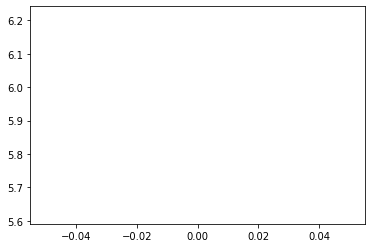

In [105]:
import matplotlib.pyplot as plt

plt.plot(range(len(history['loss'])), history['loss'])

In [106]:
!pip install hmmlearn
from hmmlearn.hmm import MultinomialHMM
print(len(tokenizer.word_index)) # vocab size? 
x_train.shape

2030


(56, 256)

In [107]:
hmm = MultinomialHMM(n_components=10, n_iter = 100) # covariance_type="full"
hmm.fit(x_train) # max: 60000

Fitting a model with 20389 free scalar parameters with only 14336 data points will result in a degenerate solution.


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=10,
               n_iter=50, params='ste',
               random_state=RandomState(MT19937) at 0x7F0006089888,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
               verbose=False)

In [124]:
generated, y  = hmm.sample(20)  # np.array([1,2,3]).reshape(-1, 1)
generated = generated.flatten()
print(generated)

for pred in generated:
  print(idx2word[pred], end =' ')

[ 945    6  105    1  123    3   28 1984   68   19   51   51   50  349
  616 1029  195  406   12  385]
endz a how i going you ayy watched mind your cause cause at name truth constantly god another it peace 

In [114]:
print(x_train.shape)
print(x_train.flatten().shape)

hmm = MultinomialHMM(n_components=10, n_iter = 300) # covariance_type="full"
hmm.fit(x_train.flatten().reshape(-1, 1)) # max: 60000

Fitting a model with 20389 free scalar parameters with only 14336 data points will result in a degenerate solution.


(56, 256)
(14336,)


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=10,
               n_iter=500, params='ste',
               random_state=RandomState(MT19937) at 0x7F0006089888,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
               verbose=False)

In [115]:
generated, y = hmm.sample(20)  # np.array([1,2,3]).reshape(-1, 1)
generated = generated.flatten()
print(generated)
for pred in generated:
  print(idx2word[pred], end =' ')

[  20   94  204  246   11    1   14   51    2   54  316   14 1661  552
    8    1   38  616    6 1258]
yeah shit smash mood me i on cause the when bled on enemy flights in i nigga truth a ops 

#### Debuging 

In [117]:
word = 'if' #clean_text(word)
inputs = np.zeros((1, 1))
inputs[0, 0] = word2idx[word]
count = 1
while count <= 50:
    pred = model.predict(inputs)
    word = np.argmax(pred)
    if word >= vocab_size:
        word = vocab_size - 1

    inputs[0, 0] = word
    
    print(idx2word[word], end=" ")
    count += 1

well na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na na 

In [ ]:
inputs = np.zeros((1, 1))
inputs[0, 0] = word2idx['at']

# inputs
pred = model.predict(inputs)
word = np.argmax(pred)
idx2word[word]